Import thư viện.

In [46]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import warnings
warnings.simplefilter('ignore')

Đọc file dữ liệu đã qua tiền xử lý.

In [47]:
data=pd.read_csv('cars_info_preprocessed.csv')
df=pd.DataFrame(data)
df.shape

(17048, 16)

Câu hỏi: Xe động cơ chạy bằng loại nhiên liệu nào được bán lại nhiều hơn?

Với tình hình năng lượng thế giới đang căng thẳng như hiện nay, có lẽ việc quan tâm đến xe chạy bằng xăng hay dầu cũng khá quan trọng. Vì vậy em chọn khảo sát về vấn đề xe chạy máy xăng hay máy dầu (em không khảo sát các loại khác vì nó chiếm một tỉ trọng khá ít trong data này và cũng chưa quá phổ biến như xe xăng và dầu). Nhưng em sẽ khảo sát những xe đã qua sử dụng thôi, để xem xe máy xăng hay máy dầu bị bán lại nhiều hơn (một phần vì em nghĩ nếu không có việc gì thì người dùng sẽ không mang xe đi bán lại, còn một phần là vì trong dữ liệu này phần rất lớn là xe bán lại, hay nói gần gũi hơn là xe cũ). Để mọi người có thể tham khảo khi sau này chọn mua xe nên chọn máy xăng hay máy dầu.

(Câu hỏi này do nhóm tự nghĩ ra).


Đoạn code dưới đây lọc bớt 1 số dòng ít cần thiết với câu hỏi và chỉ lấy những xe ở tình trạng cũ.

In [48]:
temp=df.copy()
for index, row in temp.iterrows():
    if row['Status'] == " Demo" or row['Status'] == " New In Stock":
        temp.drop(index,inplace=True)

for index, row in temp.iterrows():
    if (row['Fuel'] == "Premium Unleaded/Electric" or row['Fuel'] == "Unleaded Petrol/Electric" 
    or row['Fuel']=='Liquid Petroleum Gas' or row['Fuel']=='Diesel/Electric'):
        temp.drop(index,inplace=True)


# 'Unleaded Petrol' 'Diesel' 'Premium Unleaded Petrol'
# 'Premium Unleaded/Electric' 'Unleaded Petrol/Electric'
# 'Liquid Petroleum Gas' 'Diesel/Electric'


Đoạn code dưới nhằm gộp "Unleaded Petrol" và "Premium Unleaded Petrol" thành 1 tên chung là "Petrol".

In [49]:

temp['Fuel'] = temp['Fuel'].replace('Unleaded Petrol','Petrol')
temp['Fuel'] = temp['Fuel'].replace('Premium Unleaded Petrol','Petrol')


Đoạn code dưới vẽ biểu đồ.

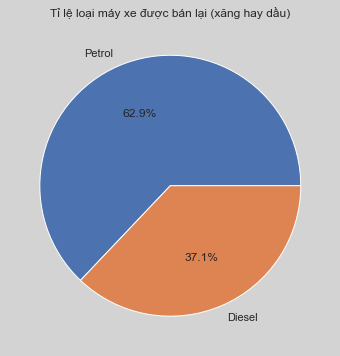

In [50]:
infor = np.array(temp['Fuel'].value_counts().index)
count = np.array(temp['Fuel'].value_counts())

# plt.figure(figsize = (10,6))
fig, ax = plt.subplots(figsize = (10,6))
# plt.bar(infor,count)
label=["Petrol","Diesel"]
plt.pie(count,labels=label,autopct='%1.1f%%')
fig.set_facecolor('lightgrey')
# plt.xlabel('Loại nhiên liệu')
# plt.ylabel('Số lượng')  
plt.title('Tỉ lệ loại máy xe được bán lại (xăng hay dầu)')
plt.show()


Ở đây có 3 loại nguyên liệu có số lượng lớn nhất, đó là Unleaded Petrol,  Diesel và Premium Unleaded Petrol (có thể hiểu nôm na là xăng, dầu Diesel và xăng cao cấp). Nhưng vì xăng hay xăng cao cấp thì cũng là xăng, nên em gộp 2 này lại và gọi chung là "Petrol".

Ta thấy được xe chạy bằng xăng bị bán lại nhiều hơn xe dầu (gần gấp đôi).

Vậy tại sao xe xăng lại bị bán lại nhiều như vậy, có thể do một số nhược điểm sau trong quá trình sử dụng:
- Tốn nhiên liệu hơn xe máy dầu.
- Dễ bốc cháy ở nhiệt độ cao gây nguy hiểm.

Ở bối cảnh mà tình hình năng lượng thế giới đang căng thẳng, việc những chiếc xe xăng tốn nhiều nguyên liệu hơn dễ bị bán lại hơn có vẻ cũng hợp lý. 

Đương nhiên đây chỉ là một trong những góc nhìn hạn hẹp của em về vấn đề này. Có thể đơn giản vì xe xăng được mua nhiều hơn nên số lượng bán lại cũng nhiều hơn. Tuy nhiên, trong phạm vi của tập dữ liệu xe đang được bán lại này nên em tiếp cận theo góc nhìn như trên.

Câu hỏi: Những hãng xe nào sản xuất nhiều xe nhất trong những năm gần đây (2020 - nay) và những hãng xe nào sản xuất ít xe nhất hoặc thậm chí ngừng sản xuất xe?

Ý nghĩa: Với góc nhìn của một người mua xe hoặc bán xe, ta có thể biết được hãng xe nào hoạt động mạnh, những hãng xe nào ít hoạt động hoặc thậm chí bị ngừng hoạt động, từ đó giúp tham khảo để mua xe hoặc phân phối xe. (Ví dụ như em nghĩ chẳng có ai muốn mua một chiếc xe mà hãng xe sản xuất ra nó đã ngừng hoạt động).

Câu hỏi do nhóm tự nghĩ ra.

Đoạn code dưới nhằm tạo một DataFrame mới từ data cũ sau khi đã xóa những chiếc xe được sản xuất trước năm 2020.

In [51]:
df_temp=df.copy()

for index, row in df_temp.iterrows():
    if row['Year'] < 2020:
        df_temp.drop(index,inplace=True)


Đoạn code dưới dùng để vẽ biểu đồ minh họa.

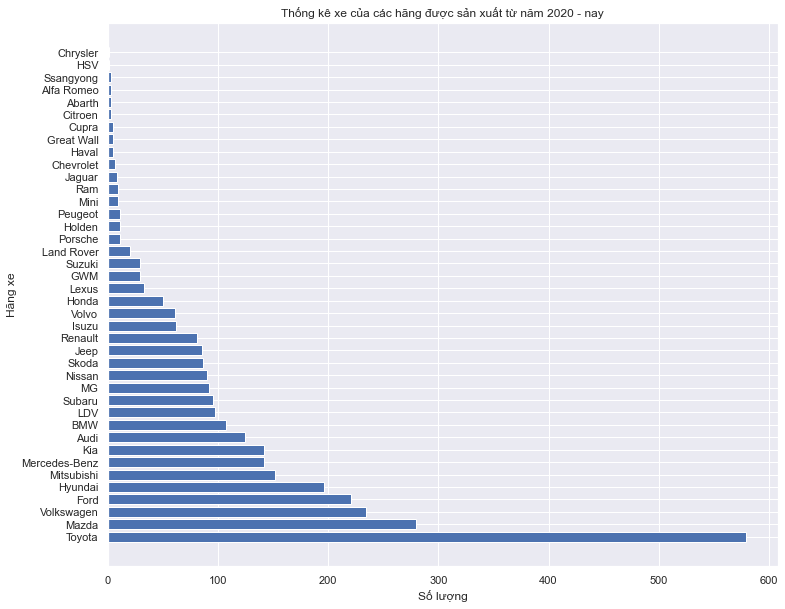

In [53]:

infor = np.array(df_temp['Brand'].value_counts().index)
count = np.array(df_temp['Brand'].value_counts())

plt.figure(figsize = (12,10))

plt.barh(infor,count)
plt.xlabel('Số lượng')
plt.ylabel('Hãng xe')  
plt.title('Thống kê xe của các hãng được sản xuất từ năm 2020 - nay')

plt.show()

Như biểu đồ trên thể hiện, ta thấy một số hãng xe đã dường như không còn sản xuất xe mới nữa (trong phạm vi tập dữ liệu này), ví dụ như Chrysler và HSV, hoặc một số hãng khác có rất ít xe được sản xuất trong 2 năm gần đây. Mặt khác ta cũng có thể thấy những hãng xe có rất nhiều xe mới, dẫn đầu không có gì bất ngờ khi là Toyota. Kế tiếp là Mazda, Volkswagen, Ford, ...